<r>22.10.2022 r.<r>
<h1><center>Assignment - part 2</center></h1>
<h2><center>Quantum Internship</center></h2>

<h3><center>Jakub Łuczka</center></h3>

In [125]:
# Import necessery modules for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [126]:
# Import functions for predictions

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor, BayesianRidge


<h3>Exercise 3</h3>

<b>Regression on the tabular data</b>

You have a dataset (internship_train.csv) that contains 53 anonymized features and a target column. Your task is to build model that predicts a target based on the proposed features. Please provide predictions for internship_hidden_test.csv file. Target metric is RMSE. The main goal is to provide github repository that contains:

● jupyter notebook with analysis;

● code for modeling (Python 3);

● file with model predictions;

● readme file;

● requirements.txt file.


<h2>Data manipulations and analysis</h2>

In [2]:
quantum = pd.read_csv('internship_train.csv')
quantum.head(10)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
5,70,299,297,350,428,359,5.830952,0.505189,1,73,...,1.486867,0.366128,11.245683,6.116113,9.315978,4.063209,7.156703,12.132241,14.141104,34.505189
6,457,363,162,67,388,326,-1.414214,0.604309,0,258,...,8.260282,5.239815,1.163579,10.797268,5.819056,4.451118,14.645322,11.739865,14.763017,2.604309
7,414,271,163,317,359,116,-6.324555,0.022464,0,485,...,5.925065,6.080010,11.318467,11.013787,12.137311,2.759765,10.537518,4.243830,3.232530,40.022464
8,420,85,378,71,243,301,-8.602325,0.228071,0,401,...,5.483159,1.534398,4.690240,11.142059,12.290323,1.975012,11.061706,14.486846,13.244187,74.228071
9,445,304,359,298,141,369,8.774964,0.919384,1,63,...,12.267670,4.999463,0.376892,0.121794,0.914422,12.471633,13.760204,14.500278,4.583603,77.919384


In [3]:
# Cheiking the amount of rows and columns
quantum.shape

(90000, 54)

In [4]:
# Cheking the names of the columns
quantum.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', 'target'],
      dtype='object')

In [5]:
# Cheking type and size of single column in dataset
quantum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [6]:
# Checking potencial null values in all columns
quantum.isna().value_counts()

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     target
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False     90000
dtype: int64

In [7]:
# Short description of each numerical column in dataset
pd.set_option('display.max_columns', None)
quantum.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

In [8]:
# Sample row based on index label
quantum.loc[0]

0         236.000000
1         488.000000
2          16.000000
3         221.000000
4         382.000000
5          97.000000
6          -4.472136
7           0.107472
8           0.000000
9         132.000000
10        281.000000
11        336.000000
12         99.000000
13          3.880098
14          1.797502
15          3.252475
16         12.131981
17          3.091361
18          5.630319
19          4.466373
20          2.511203
21          5.982724
22          4.541159
23         12.740476
24         12.634929
25          4.050294
26         11.827245
27          3.568321
28         13.420537
29          8.251807
30          2.287900
31         14.834430
32          0.082253
33          2.975561
34          5.223753
35          1.212287
36          7.302797
37          7.083149
38          3.610350
39          7.767512
40          7.829657
41          8.395356
42          1.583711
43         10.125020
44         13.340874
45          0.870542
46          1.962937
47          7

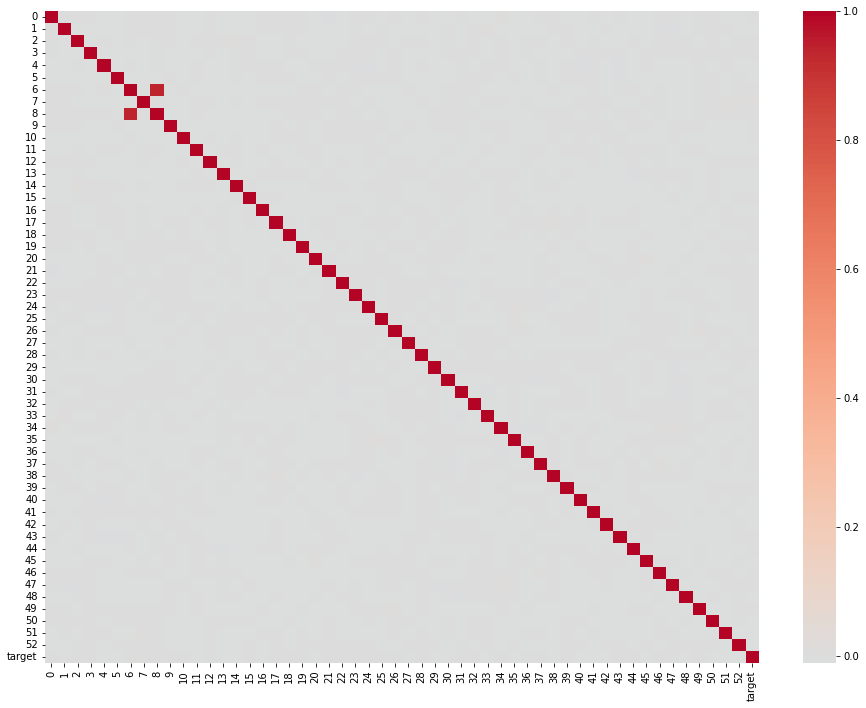

In [9]:
# Looking for correlations between features
correlation = quantum.corr(method = 'pearson')
plt.figure(figsize = (16, 12))
sns.heatmap(correlation, cmap = 'coolwarm', center = 0.0, cbar = True)
plt.show()

In [10]:
# Dropping column '6' and '7' beacuse of high correlation
new_quantum = quantum.drop(['6', '8'], axis=1)
new_quantum.shape

(90000, 52)

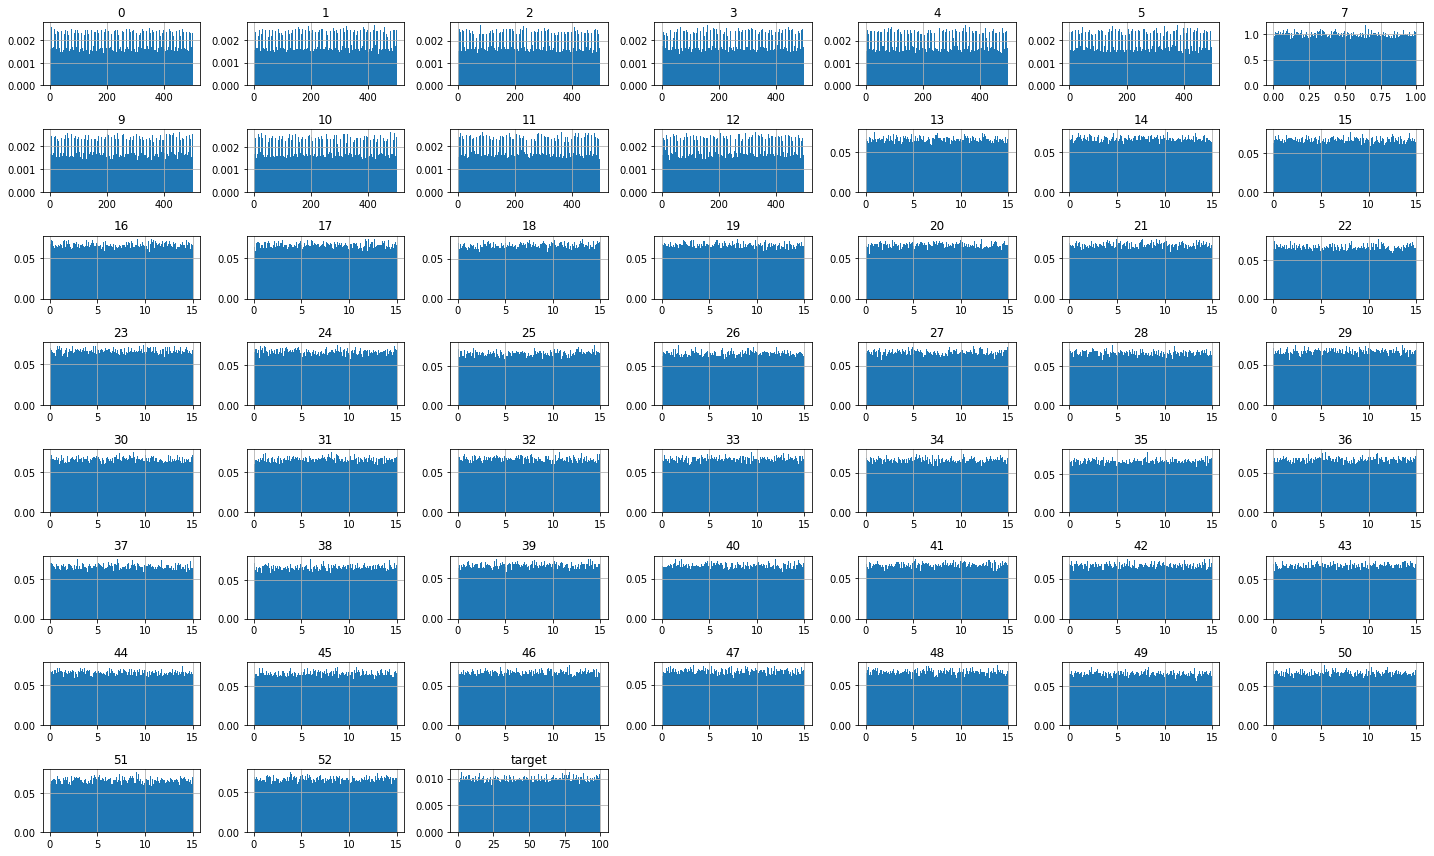

In [11]:
new_quantum.hist(bins = 200, density = True, figsize = (20, 12))
plt.tight_layout()
plt.show()

<h2>Building a model</h2>

In [127]:
data = quantum.values

# Splitting dataset into train and test part (80% : 20%)
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Using standard scaler to normalize all features
scaler = StandardScaler()
X_train_norm, X_test_norm = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

X_train_norm.shape, X_test_norm.shape, y_train.shape, y_test.shape

((72000, 53), (18000, 53), (72000,), (18000,))

In [128]:
X_train_norm[0], X_test_norm[0]

(array([ 0.80007951,  0.58413264, -0.65049342,  0.53556112, -0.02300454,
        -0.21256958, -0.97005089,  0.77826027, -0.99689371,  0.87477971,
         0.29905955, -0.9703165 , -0.8964331 ,  0.84809481,  0.49889938,
         0.28766743,  0.47314826,  0.52912179,  1.4661463 , -1.26961323,
        -1.29110363,  1.22546843, -1.15610073, -0.12351723,  1.3463846 ,
        -0.48398761, -1.67454478,  0.09134502, -0.23771525,  1.54143462,
         1.53072045,  1.40540351,  1.61220587,  1.6815696 ,  0.66744865,
         1.15116869, -0.83443337,  0.9626543 ,  1.13664242, -0.69274382,
         0.90664923,  1.00226263,  0.76920893,  1.24946747,  1.72383306,
         1.35442006, -0.36002977, -1.29299627, -1.34545154, -0.83921315,
         0.58542259, -0.03421435, -0.95565988]),
 array([-0.79865782,  0.1836997 ,  1.00835189,  1.07704257,  1.10963168,
        -0.3979704 , -0.64217725, -0.20589527, -1.00434276,  0.17918538,
        -1.59705986,  0.74098361,  0.61656784,  0.66271985,  0.14138934,
  

<h3>SGDRegressor</h3>

In [129]:
sgdr = SGDRegressor(max_iter = 1000)
sgdr.fit(X_train_norm, y_train)

SGDRegressor()

In [130]:
sgdr.score(X_test_norm, y_test)

-0.006529145328927566

In [131]:
y_pred = sgdr.predict(X_test_norm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

29.09450513153763

In [132]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds.sort_values(by = 'Actual'))

          Actual  Predicted
14342   0.008721  51.091395
13779   0.014745  51.632883
8954    0.025718  48.180618
5250    0.026404  52.205140
7101    0.027460  49.687063
...          ...        ...
11329  99.973588  49.232637
10708  99.978566  47.330505
287    99.983913  51.485648
1103   99.997653  54.325117
8842   99.997926  52.535739

[18000 rows x 2 columns]


<h3>Linear Regression</h3>

In [133]:
# Simple linear regression
linear_model = LinearRegression()
linear_model.fit(X_train_norm, y_train)

LinearRegression()

In [134]:
linear_model.score(X_test_norm, y_test)

-0.001060583630946299

In [136]:
# Transform data ones more using polynomial and interaction features
linear_poly_model = make_pipeline(PolynomialFeatures(), LinearRegression())
linear_poly_model.fit(X_train_norm, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [140]:
linear_poly_model.score(X_test_norm, y_test)

0.999024419486802

In [201]:
y_pred_linear_poly = linear_poly_model.predict(X_test_norm)
rmse_linear_poly = np.sqrt(mean_squared_error(y_test, y_pred_linear_poly))
rmse_linear_poly

0.9057938249310806

In [144]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_linear_poly.squeeze()})
print(df_preds.sort_values(by = 'Actual'))

          Actual   Predicted
14342   0.008721    0.023842
13779   0.014745    0.029894
8954    0.025718    0.011092
5250    0.026404    0.011781
7101    0.027460    0.042668
...          ...         ...
11329  99.973588  101.960778
10708  99.978566  101.965780
287    99.983913  101.971151
1103   99.997653   99.925935
8842   99.997926  101.985228

[18000 rows x 2 columns]


<h3>Lasso Regression</h3>

In [157]:
lasso_model = make_pipeline(PolynomialFeatures(), Lasso(alpha = 0.05, max_iter = 100_000))
lasso_model.fit(X_train_norm, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.05, max_iter=100000))])

In [158]:
lasso_model.score(X_test_norm, y_test)

0.9991333870692708

In [200]:
y_pred_lasso = lasso_model.predict(X_test_norm)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_lasso

0.853710021686053

<h3>Ridge Regression</h3>

In [166]:
ridge_model = make_pipeline(PolynomialFeatures(), Ridge(alpha = 0.05, max_iter = 100_000))
ridge_model.fit(X_train_norm, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.05, max_iter=100000))])

In [167]:
ridge_model.score(X_test_norm, y_test)

0.9990002090969166

In [199]:
y_pred_ridge = ridge_model.predict(X_test_norm)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_ridge

0.9169642154185914

<h3>ElasticNet</h3>

In [184]:
elastic_model = make_pipeline(PolynomialFeatures(), ElasticNet(alpha = 0.001, l1_ratio = 0.5, max_iter = 10_000))
elastic_model.fit(X_train_norm, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('elasticnet', ElasticNet(alpha=0.001, max_iter=10000))])

In [185]:
elastic_model.score(X_test_norm, y_test)

0.9989742048011269

In [198]:
y_pred_elastic = elastic_model.predict(X_test_norm)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
rmse_elastic

0.9288126640524822

<h3>Bayesian Ridge</h3>

In [190]:
bayesian_model = make_pipeline(PolynomialFeatures(), BayesianRidge(n_iter = 10_000, alpha_init = 0.001))
bayesian_model.fit(X_train_norm, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('bayesianridge',
                 BayesianRidge(alpha_init=0.001, n_iter=10000))])

In [195]:
bayesian_model.score(X_test_norm, y_test)

0.9989644813524694

In [197]:
y_pred_bayesian = bayesian_model.predict(X_test_norm)
rmse_bayesian = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))
rmse_bayesian

0.933204360077282

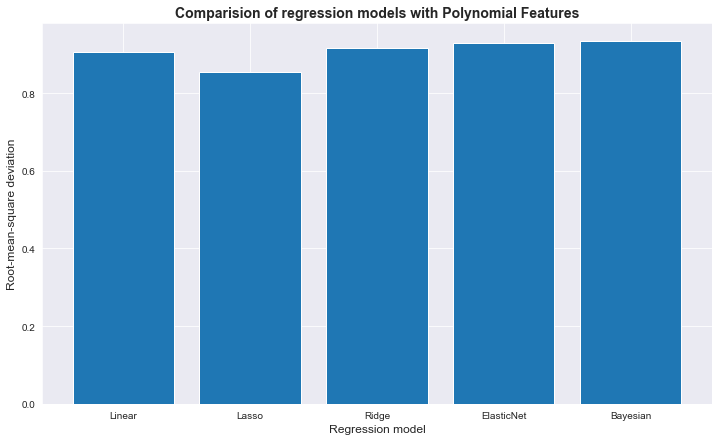

In [224]:
# For a very big RMSE error I leave here SGDRegressor and simple Linear Regression
sns.set_style('darkgrid')
plt.figure(figsize = (12, 7))

plt.bar(x = ['Linear', 'Lasso', 'Ridge', 'ElasticNet', 'Bayesian'], height = [rmse_linear_poly, rmse_lasso, rmse_ridge, rmse_elastic, rmse_bayesian])

plt.xlabel('Regression model', fontsize = 12)
plt.ylabel('Root-mean-square deviation', fontsize = 12)
plt.title('Comparision of regression models with Polynomial Features', fontsize = 14, weight = 'bold')

plt.show()

<h2>Predictions</h2>

In [225]:
hidden_data = pd.read_csv('internship_hidden_test.csv')
hidden_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,183,411,239,1.636870,4.316116,3.087304,12.844492,0.054046,0.643383,3.104759,5.579529,7.633182,9.056701,8.621463,4.039640,1.191639,2.775038,9.728365,6.701686,11.456474,3.380898,4.866598,6.705850,2.521471,3.124903,12.787034,7.653819,2.067580,14.527098,13.773822,6.570842,7.280782,9.876851,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,229,420,476,6.256282,0.410825,0.693713,5.895766,7.309578,2.315738,6.204979,4.264013,11.956969,1.801893,13.581027,7.460250,7.883021,10.537323,12.286389,4.499934,3.302528,1.490149,10.010222,2.469233,9.206524,3.097949,14.556454,10.811960,14.584917,2.021892,7.956624,3.006465,10.685368,5.047971,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,448,420,428,5.724503,12.465191,1.977254,7.652835,2.649014,14.531226,1.293337,9.192163,7.218093,9.580598,10.240284,12.522093,11.639480,11.349518,10.959723,12.820784,9.176369,10.157479,4.107533,7.454075,12.178675,9.401233,10.292276,3.530603,12.680169,10.921196,8.008255,14.940933,4.579603,14.150860,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,315,23,421,10.868374,8.335662,3.561422,9.939135,4.885376,7.706857,4.214658,10.346181,2.590524,1.511884,2.357567,5.231946,4.697991,11.870758,0.455004,0.645782,7.849633,5.334536,5.262470,9.251172,9.335831,9.708345,6.091409,6.789830,1.552119,12.569473,7.002166,4.999168,14.278131,0.650444,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,74,481,55,11.871029,10.237341,14.890562,4.589386,12.968020,4.907581,14.461897,13.128528,4.062875,2.253413,12.471074,7.078105,0.843648,14.961904,6.157512,11.370193,12.969449,7.130421,8.974373,6.173560,12.682708,7.864171,2.075725,14.339978,3.365456,6.278199,9.302832,9.715296,14.142186,9.875013,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [226]:
hidden_data.values

array([[2.59000000e+02, 3.88000000e+02, 4.02000000e+02, ...,
        1.58195658e-01, 1.34325512e+01, 2.51119147e+00],
       [4.41000000e+02, 1.92000000e+02, 3.81000000e+02, ...,
        9.10796559e+00, 1.30240742e+00, 1.11056039e+01],
       [8.30000000e+01, 1.29000000e+02, 1.07000000e+02, ...,
        3.16002334e+00, 2.24379899e+00, 5.07302983e+00],
       ...,
       [3.49000000e+02, 2.40000000e+02, 3.55000000e+02, ...,
        5.10003085e+00, 1.49843167e+00, 8.09380144e+00],
       [4.27000000e+02, 7.00000000e+01, 6.30000000e+01, ...,
        9.96692372e+00, 8.53898137e+00, 7.03636660e+00],
       [1.44000000e+02, 2.16000000e+02, 6.60000000e+01, ...,
        7.29626760e-01, 7.67049219e-01, 9.54179534e+00]])

In [228]:
# I choose Lasso Regression model because of the smallest RMSE error
y_pred_hidden = lasso_model.predict(hidden_data)
y_pred_hidden

C:\Users\Kuba\anaconda3\envs\dataanalysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


array([ 544.13854911, 3912.08853894,  346.45307819, ..., 1088.22222879,
        791.43550062, 4501.19763392])

In [229]:
results = pd.DataFrame()
results['Hidden_test_predictions'] = y_pred_hidden
print(results)

      Hidden_test_predictions
0                  544.138549
1                 3912.088539
2                  346.453078
3                 1882.626801
4                 3165.553175
...                       ...
9995              2225.671012
9996              1582.820479
9997              1088.222229
9998               791.435501
9999              4501.197634

[10000 rows x 1 columns]


In [230]:
results.to_csv('Internship_hidden_test_predictions.csv')

In [232]:
status = pd.read_csv('Internship_hidden_test_predictions.csv', index_col=0)
status.head()

,Hidden_test_predictions
0,544.138549
1,3912.088539
2,346.453078
3,1882.626801
4,3165.553175
